### Case Study Description
The data contains features extracted from the silhouette of vehicles in different
angles. Four "Corgie" model vehicles were used for the experiment: a double
decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This
particular combination of vehicles was chosen with the expectation that the
bus, van and either one of the cars would be readily distinguishable, but it
would be more difficult to distinguish between the cars.

### Objective
The purpose is to classify a given silhouette as one of three types of vehicle,
using a set of features extracted from the silhouette. The vehicle may be viewed
from one of many different angles.

In [1]:
## import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn import metrics
from scipy.stats import zscore
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

In [2]:
## Importing data
vehicle = pd.read_csv('vehicle-1.csv')

### Initial Data Inspection

In [3]:
vehicle.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [4]:
vehicle.shape

(846, 19)

In [5]:
vehicle.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

#### Observations
 - There are 846 rows and 19 columns in the dataset
 - 'Class' column represents the target variable to be predicted
 - All columns are numeric
 - There are null values present in the dataset

### Data Exploration

#### Univariate  and Bivariate Analysis of Input Features

In [6]:
vehicle.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

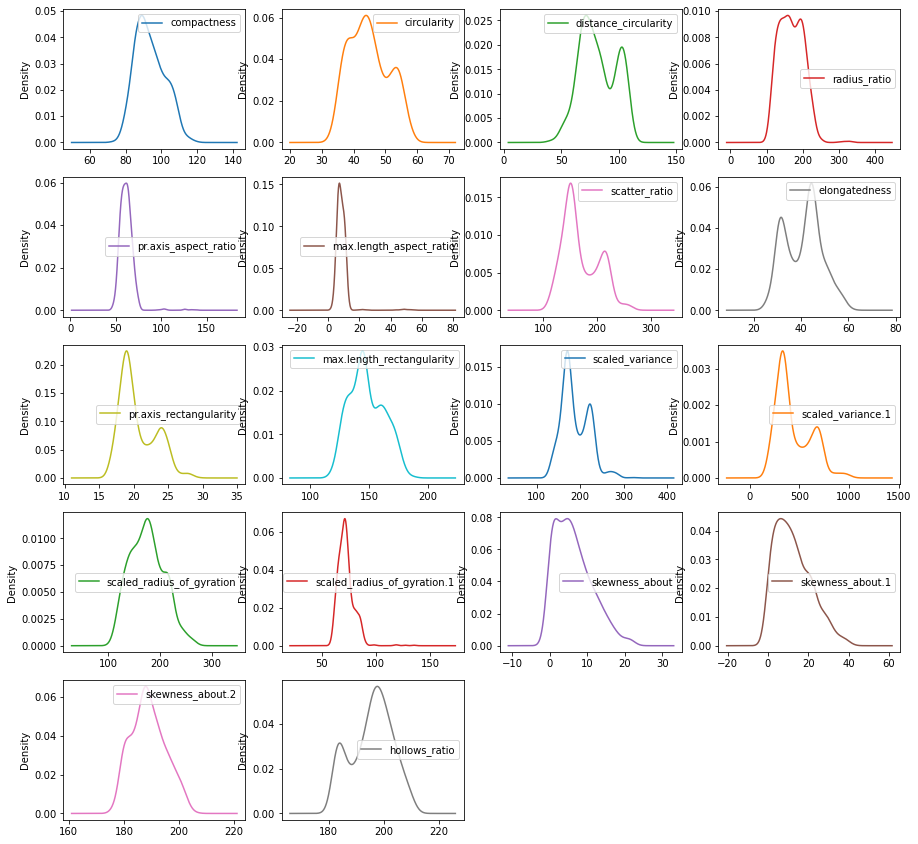

In [7]:
vehicle.plot.kde(subplots =True, layout = (6,4), figsize = (15,18), sharex=False);

##### Observations
- Some variables have 2 peaks in the distribution, may represent presence of inherent clusters in the data
- Most variables have close to normal distribution, with presence of Outliers

#### Bivariate Analysis

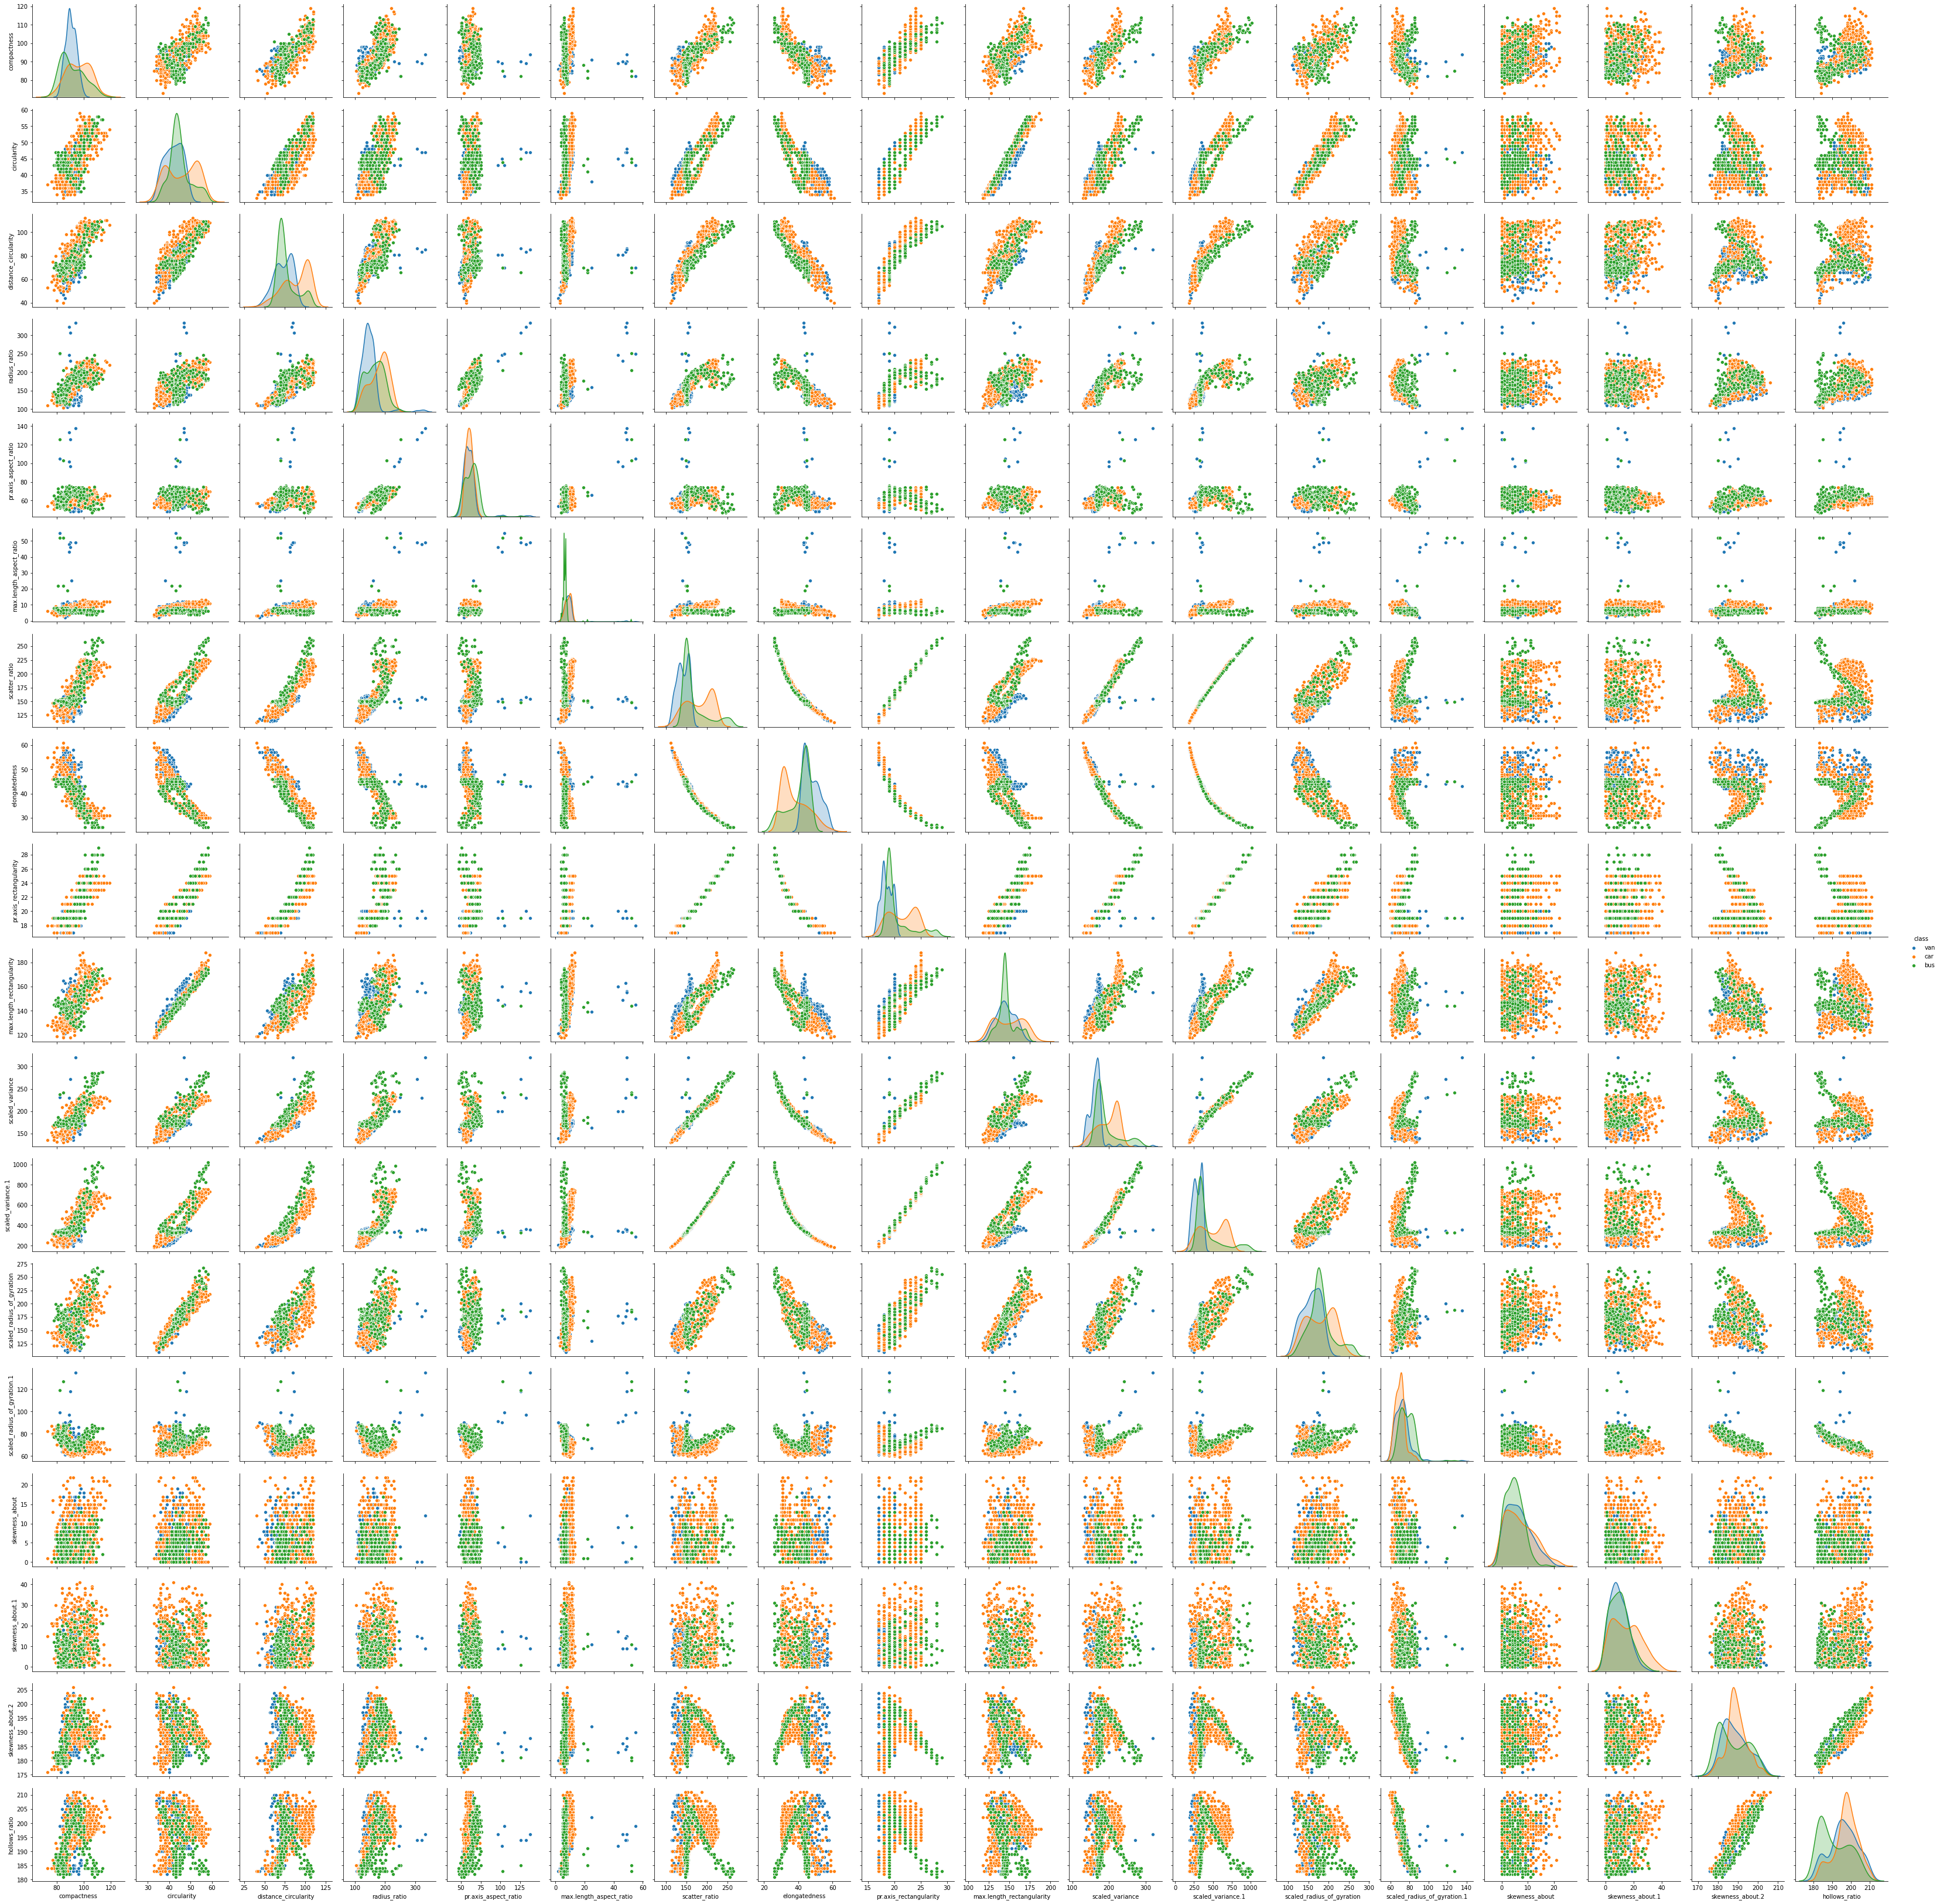

In [8]:
sns.pairplot(vehicle,hue = 'class');

##### Observations
1. Looking at the KDE plots we see that, 
    a) Bus and Van have peak close to one another, whereas Car has a peak at distinguishable distance(In most cases) from the rest. This could indicate that Cars can be well distinguished from Vans and Buses
2. Looking at the scatterplots, most variables look correlated
3. Columns - pr.axis_aspect_ratio,max.length_aspect_ratio, skewness_about,skeweness_about.l,skewness_about.2 and hollows_ratio do not show much variation with most other variables as well as the target

#### Understanding the Correlation between variables

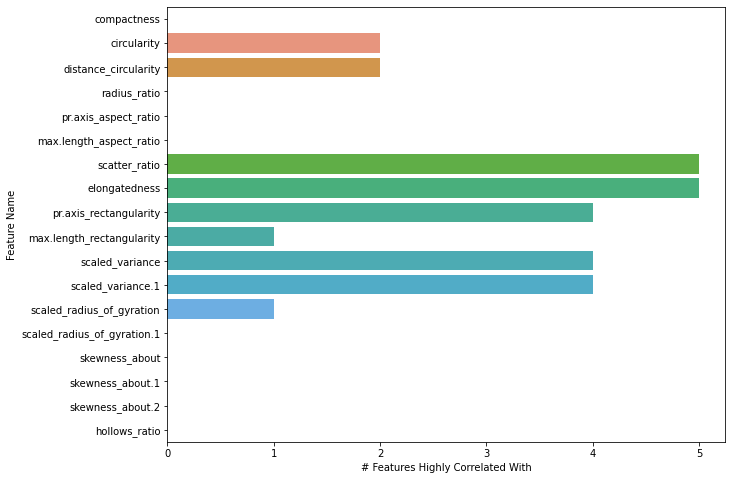

In [9]:
### Plotting how many other columns is each feature highly correalted with
corr =vehicle.corr()[(abs(vehicle.corr())>0.9)& (abs(vehicle.corr())<1)]
fig, ax = plt.subplots(figsize = (10,8))
sns.barplot(y = corr.count().index, x =corr.count(), ax = ax)
ax.set(xlabel="# Features Highly Correlated With", ylabel='Feature Name');

- Scatter Ratio and Elongatedness are highly correlated with 5 other variables
- Scaled_variance, Scaled_variance.1 and pr.axis_rectangularity are highly correalted with 4 other variables
- These highly correlated variables could  inflatE the eigen values for corresponding eigen vector directions in PCA

#### Target Column Analysis

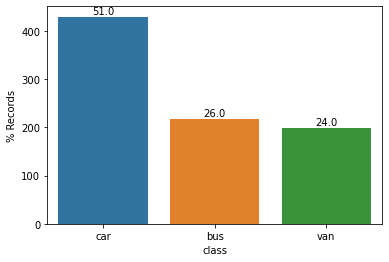

In [10]:
ax = sns.countplot(vehicle['class'],order=vehicle['class'].value_counts().index)
plt.ylabel("% Records")
for p, label in zip(ax.patches,(round(100*vehicle['class'].value_counts(normalize=True),0))):
    ax.annotate(label, (p.get_x()+0.3, p.get_height()+5))

The target variable is evenly distributed for 'Bus' and 'Van', however, there are majorly records for 'Car' class

### Data Preparation

#### Null Values Handling

In [11]:
## Identifying Columns with Null Values
vehicle.isnull().sum()[vehicle.isnull().sum()>0]

circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
dtype: int64

In [12]:
## Identifying the unique records with null records
print("Number of unique records with Null Values: ",vehicle[(vehicle.isnull().T.sum()>0).T].shape[0])
print("Records with Null Values -")
vehicle[(vehicle.isnull().T.sum()>0).T].head()

Number of unique records with Null Values:  33
Records with Null Values -


compactness  circularity  distance_circularity  radius_ratio  \
5           107          NaN                 106.0         172.0   
9            93         44.0                  98.0           NaN   
19          101         56.0                 100.0         215.0   
35          100         46.0                   NaN         172.0   
66           81         43.0                  68.0         125.0   

    pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
5                   50.0                        6          255.0   
9                   62.0                       11          183.0   
19                   NaN                       10          208.0   
35                  67.0                        9          157.0   
66                  57.0                        8          149.0   

    elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
5            26.0                    28.0                        169   
9            36.0                    22.0                        146   
19           32.0                    24.0                        169   
35           43.0                    20.0                        150   
66           46.0                    19.0                        146   

    scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
5             280.0              957.0                      264.0   
9             202.0              505.0                      152.0   
19            227.0              651.0                      223.0   
35            170.0              363.0                      184.0   
66            169.0              323.0                      172.0   

    scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
5                          85.0             5.0               9.0   
9                          64.0             4.0              14.0   
19                         74.0             6.0               5.0   
35                         67.0            17.0               7.0   
66                          NaN             NaN              18.0   

    skewness_about.2  hollows_ratio class  
5              181.0            183   bus  
9              195.0            204   car  
19             186.0            193   car  
35             192.0            200   van  
66             179.0            184   bus

Since the number of records with missing values is less, we can replace them with the Median. We choose median since outliers are present in the data

#### Outlier Detection

PCA is highly impacted by outliers and it is vital to handle these

In [13]:
## Calculating how many outliers per column
def outlier_count(x):
    upper = np.mean(x)+(2*np.std(x))
    lower = np.mean(x)-(2*np.std(x))
    y = x[(x>upper)|(x<lower)].count()
    return y
vehicle.drop(['class'],axis=1).apply(lambda x:outlier_count(x))

compactness                    20
circularity                     6
distance_circularity            7
radius_ratio                    8
pr.axis_aspect_ratio            8
max.length_aspect_ratio        12
scatter_ratio                  23
elongatedness                  21
pr.axis_rectangularity         24
max.length_rectangularity      14
scaled_variance                27
scaled_variance.1              24
scaled_radius_of_gyration      28
scaled_radius_of_gyration.1    15
skewness_about                 33
skewness_about.1               33
skewness_about.2               21
hollows_ratio                   4
dtype: int64

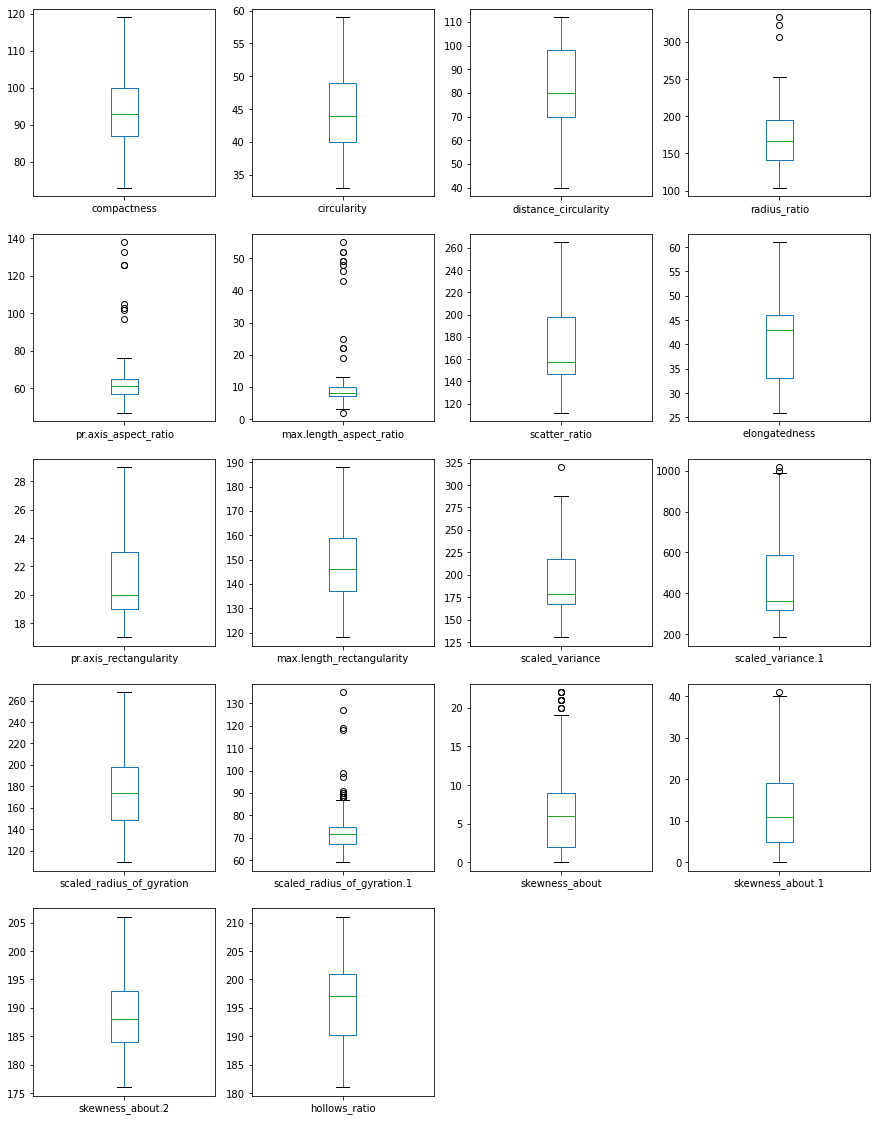

In [14]:
##Visualizing Outliers
vehicle.plot.box(subplots =True, layout = (5,4), figsize = (15,20));

We have identified Null Values and Outliers in the dataset and will handle the same after splitting the data into Train and Test (Next Section), to avoid any data leakage while developing the model. 

#### Target Variable Encoding

In [16]:
## Encoding Target Variable
li = LabelEncoder()
y_original = vehicle['class']
vehicle['class'] = li.fit_transform(np.array(vehicle['class']))

The following encoding scheme is applied- 
0 - Bus
1 - Car
2 - Van

### Model Data Preprocessing

In [17]:
## Split data into train and test
X = vehicle.drop(['class'], axis =1)
y = vehicle['class']
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size =0.3, random_state =10)
print(X_train.shape, X_test.shape, y_train.shape,y_test.shape)

(592, 18) (254, 18) (592,) (254,)


In [18]:
## Replacing Outliers with Median
def outlier_replace(x):
    repl = np.median(x)
    upper = np.mean(x)+(2*np.std(x))
    lower = np.mean(x)-(2*np.std(x))
    x = np.where((x>upper)|(x<lower), repl,x)
    return x
X_train1 =X_train.apply(lambda x:outlier_replace(x))
X_test1 =X_test.apply(lambda x:outlier_replace(x))
X1 = X.apply(lambda x:outlier_replace(x))

In [19]:
## Replacing Nulls with Median
si = SimpleImputer(strategy = "median")
X_train2 = si.fit_transform(X_train1)
X_test2 = si.fit_transform(X_test1)
X2 = si.fit_transform(X1)

In [20]:
## Scaling the dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train2)
X_test_scaled = scaler.fit_transform(X_test2)
X_scaled = scaler.fit_transform(X2)

### Modelling

In [21]:
##Grid Search for best hyperparameter combination for our data
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=False)
x=grid.fit(X_train_scaled,y_train)

In [22]:
print(grid.best_estimator_)

SVC(C=10, gamma=0.1)


Based on above grid search, we will use C=10 and gamma =0.1

In [23]:
## Creating a baseline SVM model using all raw features
svc = SVC(gamma =0.1 , C =10, kernel ='rbf',random_state =10)
model_allfeatures = svc.fit(X_train_scaled,y_train)

In [24]:
score = pd.DataFrame(index=['Accuracy'])
y_pred = svc.predict(X_test_scaled)
print ("The Test Accuracy = ",metrics.accuracy_score(y_pred, y_test)*100,"%")
score['Raw Features']= (metrics.accuracy_score(y_pred, y_test)*100)

The Test Accuracy =  96.06299212598425 %


In [25]:
## Checking for Cross Validation Score
cv = KFold(n_splits=5, random_state=10, shuffle=True)
score['Raw Features CV'] = 100*np.mean(cross_val_score(model_allfeatures, X_scaled, y, scoring='accuracy', cv=cv, n_jobs=-1))
print ("The CV Accuracy = ",score['Raw Features CV'][0],"%")

The CV Accuracy =  95.74382178907067 %


### Dimensionality Reduction using PCA

In [26]:
## Creating Principal Components
pca = PCA(random_state =10)
pca.fit(X_scaled)

PCA(random_state=10)

In [27]:
## Exploring the load factors for each component
pca_components = pd.DataFrame(pca.components_,columns = X.columns)
pca_components

compactness  circularity  distance_circularity  radius_ratio  \
0      0.262053     0.277173              0.297028      0.282381   
1     -0.050006     0.191779              0.015608     -0.173112   
2      0.082916    -0.144575              0.124405     -0.135126   
3      0.112174     0.124197             -0.004188     -0.153396   
4      0.092554    -0.077116             -0.039788      0.223766   
5      0.415201    -0.099508              0.095140     -0.010843   
6      0.334114     0.331282              0.034089     -0.005251   
7      0.497849    -0.174873              0.205615      0.134501   
8     -0.400386     0.039990              0.603667      0.223710   
9      0.420511    -0.033729             -0.100146      0.096765   
10    -0.109071     0.184465             -0.293704      0.117598   
11     0.045565    -0.003539              0.055752      0.262593   
12    -0.010684    -0.013936              0.578351     -0.252099   
13     0.045513    -0.196804              0.188013      0.068729   
14    -0.000719     0.769619              0.030468      0.128471   
15    -0.124474    -0.159804             -0.081835      0.741143   
16     0.011213    -0.017920              0.023028      0.059571   
17    -0.003198     0.004192              0.012456      0.019454   

    pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0               0.119606                 0.220085       0.310263   
1              -0.255488                -0.048946       0.045856   
2              -0.463088                 0.136168       0.051704   
3              -0.275189                 0.156833      -0.086092   
4               0.386198                -0.558885       0.010231   
5              -0.529250                -0.420741       0.060094   
6               0.038038                -0.213945      -0.275237   
7               0.258781                 0.415883      -0.109186   
8              -0.085522                -0.112294      -0.166354   
9               0.018677                -0.152651      -0.023204   
10              0.000224                -0.213636       0.071246   
11             -0.114536                 0.167235      -0.121860   
12              0.149876                -0.207643       0.074265   
13             -0.057731                -0.207056      -0.062480   
14             -0.075791                 0.009114      -0.022796   
15             -0.282433                 0.023206      -0.034787   
16             -0.021560                 0.011447       0.438212   
17             -0.004283                -0.040755       0.740837   

    elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       -0.294138                0.308559                   0.262464   
1       -0.074976                0.057945                   0.186746   
2       -0.024340                0.071042                  -0.090281   
3        0.103419               -0.069752                   0.169757   
4       -0.171342                0.000633                  -0.187596   
5       -0.241733                0.066423                  -0.119400   
6       -0.049868               -0.259535                   0.461734   
7       -0.034274               -0.061464                  -0.002890   
8       -0.357876               -0.191571                  -0.037826   
9        0.219749                0.002305                  -0.270884   
10       0.121940                0.097076                   0.492635   
11       0.297539               -0.250122                  -0.017835   
12       0.567461                0.230798                   0.086704   
13       0.307216               -0.152062                   0.172351   
14       0.208967               -0.022150                  -0.481905   
15       0.243334                0.191416                   0.090329   
16       0.042361               -0.766827                   0.034157   
17       0.065500                0.075754                  -0.004292   

    scaled_variance  scaled_variance.1  scaled_ra

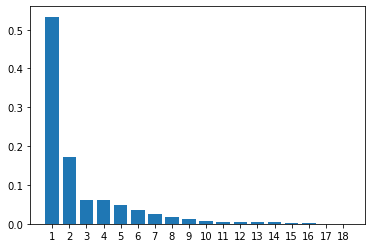

In [28]:
##Analysing Scree Plot to choose the right number of Principal Components
plt.bar(['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18'],pca.explained_variance_ratio_, align ='center');

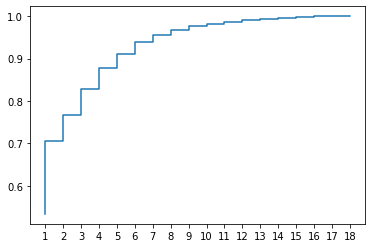

In [29]:
## Plotting Cumulative Explained Variance Graph
plt.step(['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18'],
         np.cumsum(pca.explained_variance_ratio_));

In [30]:
np.cumsum(pca.explained_variance_ratio_)

array([0.53334895, 0.70477359, 0.76730469, 0.82869542, 0.87707237,
       0.91203128, 0.93835962, 0.95624452, 0.96815049, 0.97640424,
       0.98203517, 0.98691782, 0.99066091, 0.99402136, 0.99663235,
       0.99875349, 0.99949586, 1.        ])

From the above charts it is evident that Top 9 principal components are covering ~95% of the Explained Variance and will use these for re-modelling

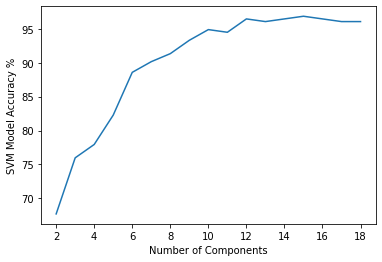

In [31]:
## Looking at the model accuracy value for every n_components value
x = list(range(0,19))
for i in range(2,19):
    pca = PCA(n_components =i,random_state =10)
    pca.fit(X_scaled)
    X_scaled_reduced = pca.transform(X_scaled)
    X_train_scaled_reduced = pca.transform(X_train_scaled)
    X_test_scaled_reduced = pca.transform(X_test_scaled)
    svc = SVC(gamma =0.1 , C =10, kernel ='rbf',random_state =10)
    model_reducedfeatures = svc.fit(X_train_scaled_reduced,y_train)
    y_pred = svc.predict(X_test_scaled_reduced)
    x[i]= (metrics.accuracy_score(y_pred, y_test)*100)
sns.lineplot(x=range(2,19),y = x[2:19]);
plt.xlabel("Number of Components")
plt.ylabel("SVM Model Accuracy %");

The accuracy for 10 principal components is around 96%, beyond which the accuracy remains almost similar. We also know from above that 9 components cover ~95% variation in data. **So 10 components also would cover more than 95% variation. Hence, we would go ahead with Top 10 principal components to rebuild our model**

In [32]:
### Shortlisting components and recreating PCA - Selecting top 10 
pca = PCA(n_components =10, random_state =10)
pca.fit(X_scaled)
X_scaled_reduced = pca.transform(X_scaled)
X_train_scaled_reduced = pca.transform(X_train_scaled)
X_test_scaled_reduced = pca.transform(X_test_scaled)

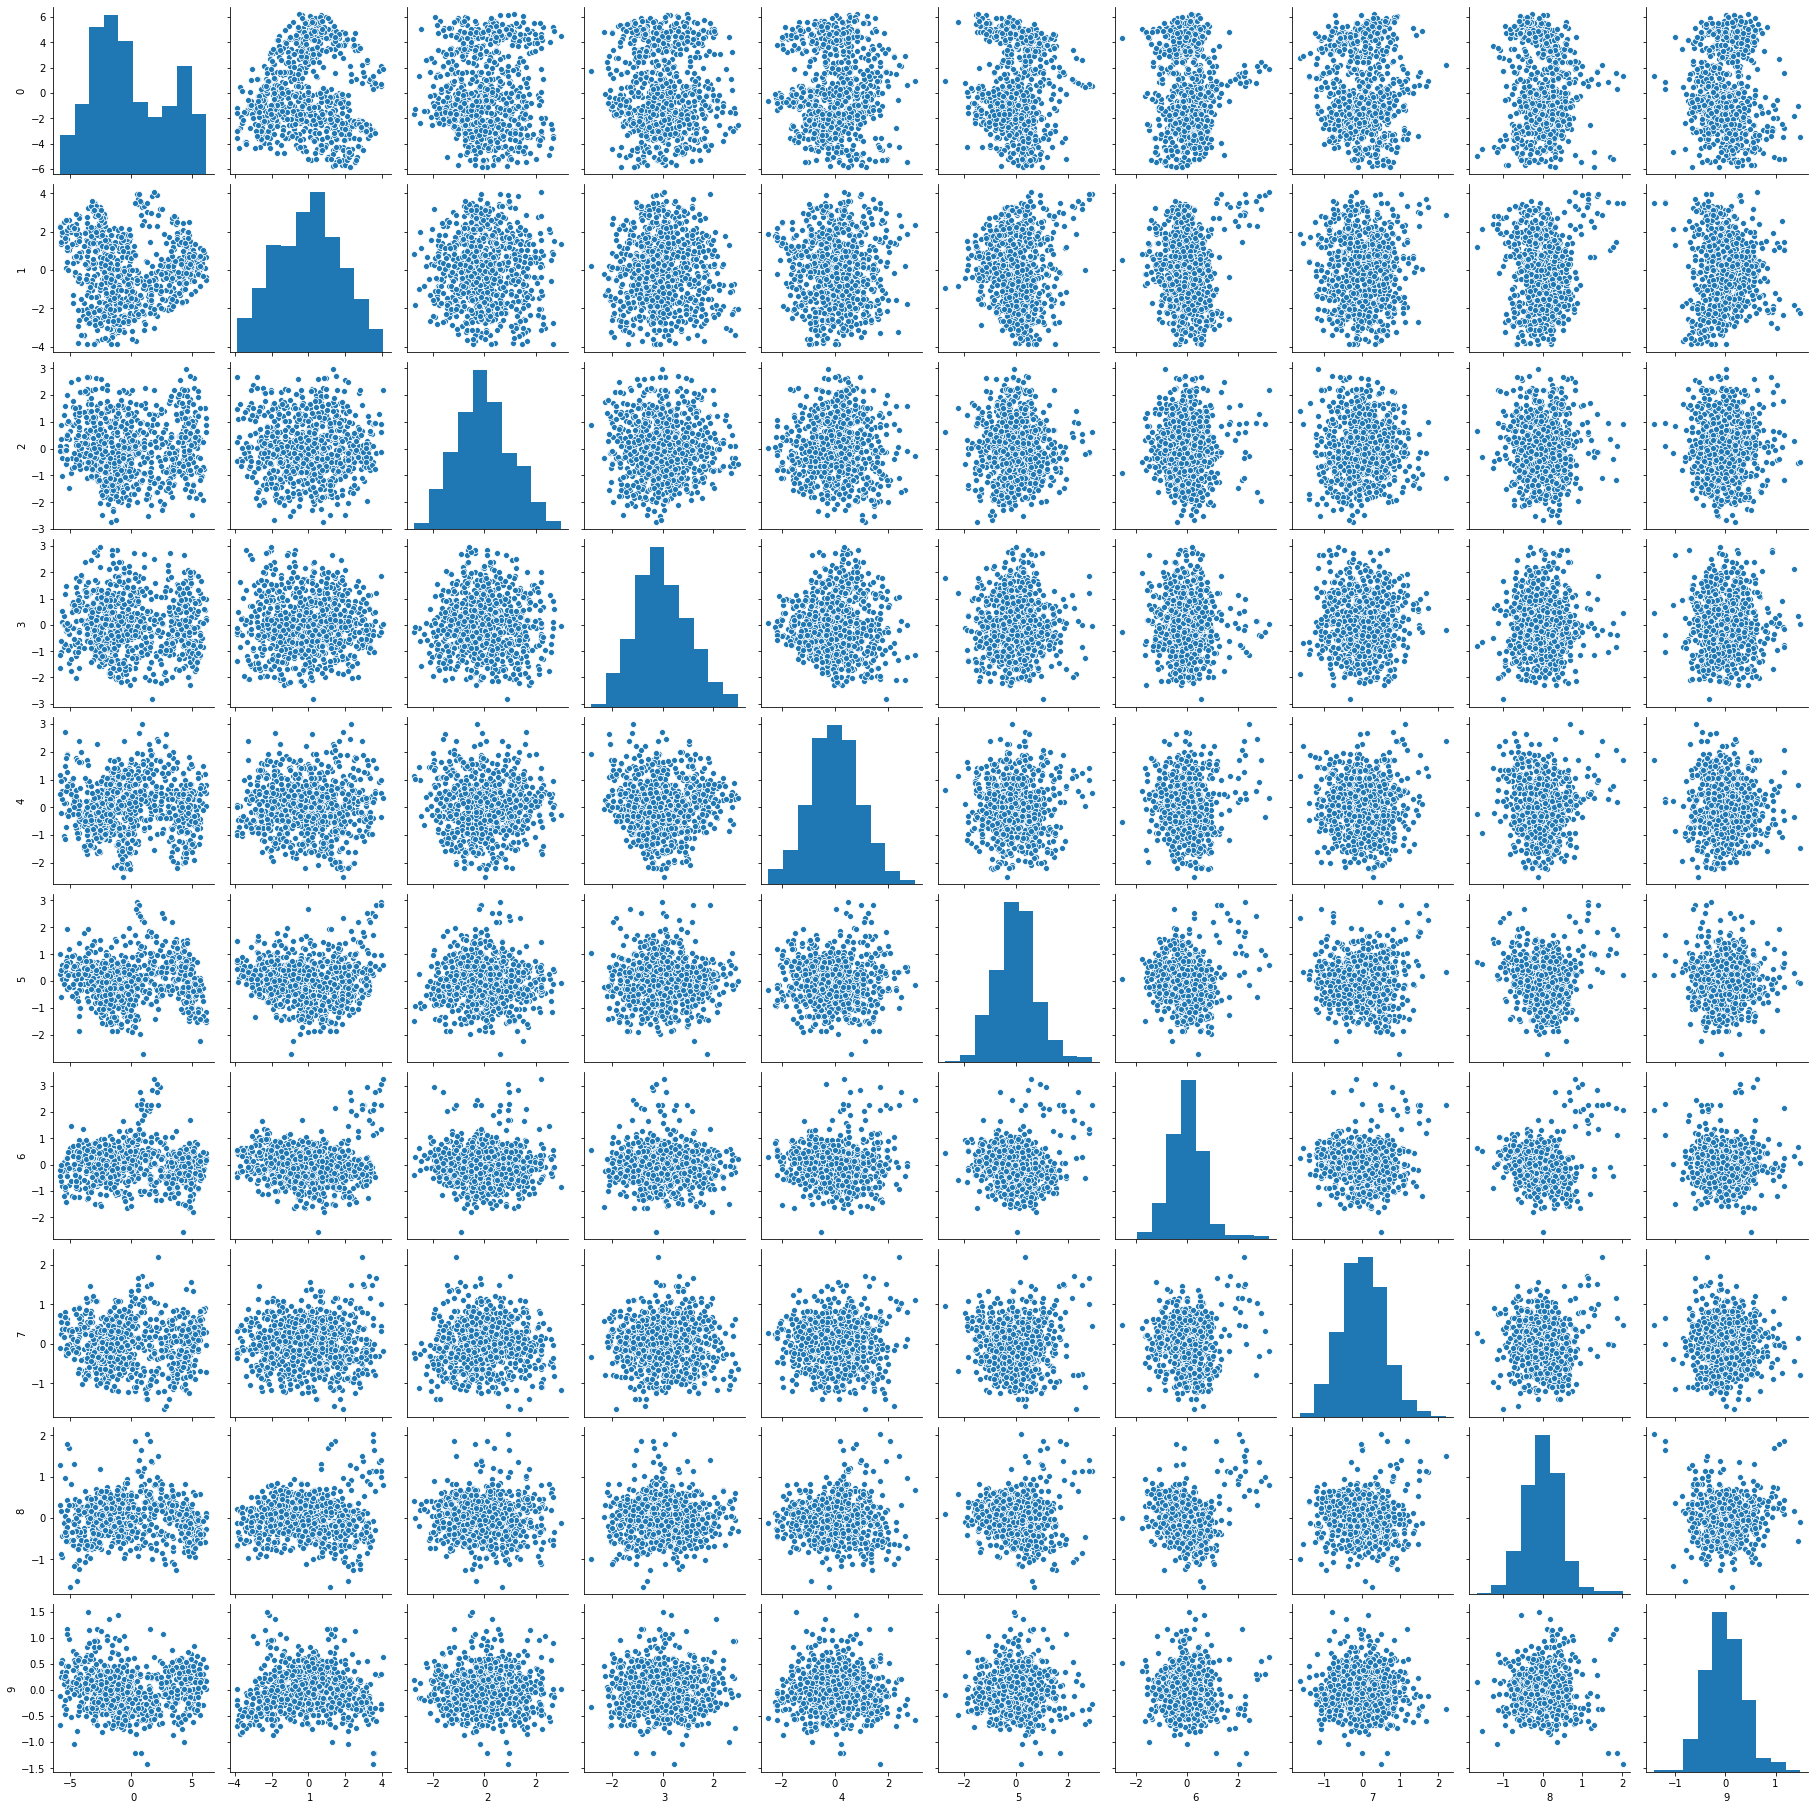

In [33]:
## Looking at their bivariate distribution
sns.pairplot(pd.DataFrame(X_scaled_reduced));

Observations
 - Most components show a random distribution of dots in the plot indicating no correlation among the components, which is expected

In [35]:
svc = SVC(gamma =0.1 , C =10, kernel ='rbf',random_state=10)
model_reducedfeatures = svc.fit(X_train_scaled_reduced,y_train)
y_pred = svc.predict(X_test_scaled_reduced)
print ("The Train Accuracy = ",metrics.accuracy_score(svc.predict(X_train_scaled_reduced),y_train)*100,"%")
print ("The Test Accuracy = ",metrics.accuracy_score(y_pred, y_test)*100,"%")
score['PCA Features']= (metrics.accuracy_score(y_pred, y_test)*100)

The Train Accuracy =  99.66216216216216 %
The Test Accuracy =  94.88188976377953 %


In [36]:
## Cross Validation Score for PCA features model
cv = KFold(n_splits=5, random_state=10, shuffle=True)
score['PCA Features CV'] = 100*np.mean(cross_val_score(model_reducedfeatures, X_scaled_reduced, y, scoring='accuracy', cv=cv, n_jobs=-1))
print ("The CV Accuracy = ",score['PCA Features CV'][0],"%")

The CV Accuracy =  95.50783153498085 %


### Result Summary

In [43]:
score

Raw Features  Raw Features CV  PCA Features  PCA Features CV
Accuracy     96.062992        95.743822      94.88189        95.507832

#### Conclusion
- Even by reducing features from 18 to 10, we only suffered a loss in Accuracy of 2% in test-train set up. 
- The expected performance in production (CV Score) is extremely close for both the raw features as well as Top 10 PCA features